       Fecha  Unidades
0 2012-01-01         0
1 2012-01-02       188
2 2012-01-03       482
3 2012-01-04       927
4 2012-01-05      1159
                     Fecha     Unidades
count                 2192  2192.000000
mean   2014-12-31 12:00:00   782.165602
min    2012-01-01 00:00:00     0.000000
25%    2013-07-01 18:00:00   293.000000
50%    2014-12-31 12:00:00   865.500000
75%    2016-07-01 06:00:00  1173.000000
max    2017-12-31 00:00:00  3603.000000
std                    NaN   551.164725


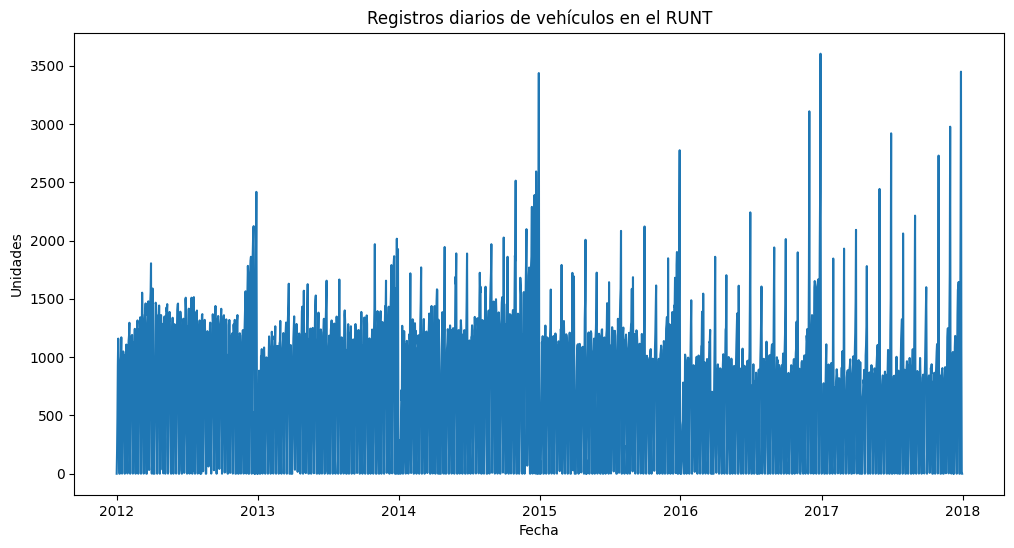

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
data = pd.read_excel("registros_autos_entrenamiento.xlsx")

# Visualizar las primeras filas del DataFrame
print(data.head())

# Estadísticas descriptivas
print(data.describe())

# Visualizar la relación entre las variables a lo largo del tiempo
plt.figure(figsize=(12, 6))
sns.lineplot(x='Fecha', y='Unidades', data=data)
plt.title('Registros diarios de vehículos en el RUNT')
plt.show()


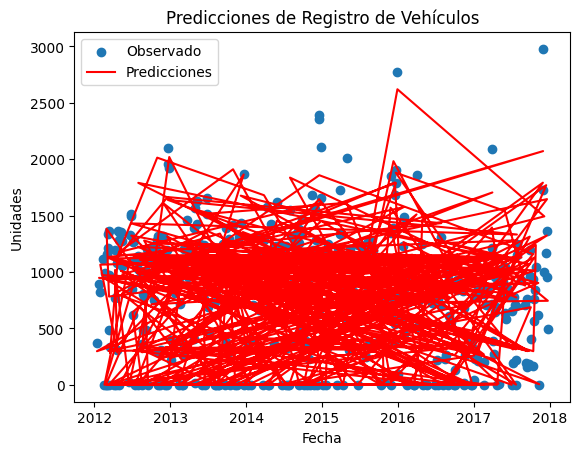

Mean Absolute Error (MAE): 140.50475958598673
Mean Squared Error (MSE): 39388.22540617718
Root Mean Squared Error (RMSE): 198.46467042316922
R-squared (R2): 0.8653971746780202
Explained Variance Score: 0.8660011340373022
Importancia de las variables:
    Variable  Importancia
0  EsFestivo     0.193437
1  DiaSemana     0.606012
2     DiaMes     0.127641
3        Mes     0.072910


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
import matplotlib.pyplot as plt

# Cargar datos
df_registros = pd.read_excel('registros_autos_entrenamiento.xlsx')
df_festivos = pd.read_csv('dias_festivos_colombia_2011_2018.csv')

# Convertir la columna 'Fecha' a tipo datetime
df_registros['Fecha'] = pd.to_datetime(df_registros['Fecha'])
df_festivos['Fecha'] = pd.to_datetime(df_festivos['Fecha'])

# Fusionar datos con días festivos
df_registros = pd.merge(df_registros, df_festivos[['Fecha', 'NombreFeriado']], on='Fecha', how='left')

# Crear variable binaria para días festivos
df_registros['EsFestivo'] = df_registros['NombreFeriado'].notna().astype(int)

# Crear variables adicionales
df_registros['DiaSemana'] = df_registros['Fecha'].dt.dayofweek
df_registros['DiaMes'] = df_registros['Fecha'].dt.day
df_registros['Mes'] = df_registros['Fecha'].dt.month

# Dividir datos en conjunto de entrenamiento y prueba
train_data, test_data = train_test_split(df_registros, test_size=0.2, shuffle=True, random_state=42)

# Seleccionar variables explicativas
features = ['EsFestivo', 'DiaSemana', 'DiaMes', 'Mes']
X_train = train_data[features]
y_train = train_data['Unidades']

X_test = test_data[features]
y_test = test_data['Unidades']

# Normalizar variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicializar y entrenar un modelo de regresión RandomForest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Obtener el mejor modelo del GridSearch
best_model = grid_search.best_estimator_

# Realizar predicciones en conjunto de prueba
predictions = best_model.predict(X_test_scaled)

# Calcular métricas de desempeño
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test, predictions)
explained_var = explained_variance_score(y_test, predictions)

# Visualizar las predicciones
plt.scatter(test_data['Fecha'], y_test, label='Observado')
plt.plot(test_data['Fecha'], predictions, label='Predicciones', color='red')
plt.title('Predicciones de Registro de Vehículos')
plt.xlabel('Fecha')
plt.ylabel('Unidades')
plt.legend()
plt.show()

# Mostrar métricas de desempeño
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')
print(f'Explained Variance Score: {explained_var}')

# Mostrar importancia de las variables
feature_importances = pd.DataFrame({'Variable': features, 'Importancia': best_model.feature_importances_})
print("Importancia de las variables:")
print(feature_importances)


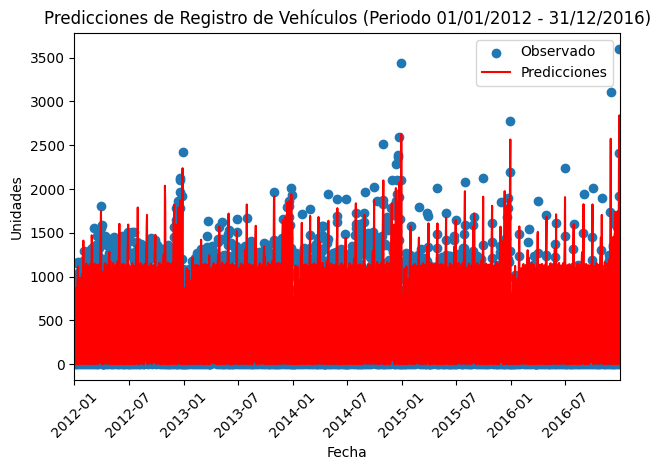

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Cargar datos de entrenamiento
df_registros = pd.read_excel('registros_autos_entrenamiento.xlsx')
df_festivos = pd.read_csv('dias_festivos_colombia_2011_2018.csv')

# Convertir la columna 'Fecha' a tipo datetime
df_registros['Fecha'] = pd.to_datetime(df_registros['Fecha'])
df_festivos['Fecha'] = pd.to_datetime(df_festivos['Fecha'])

# Fusionar datos con días festivos
df_registros = pd.merge(df_registros, df_festivos[['Fecha', 'NombreFeriado']], on='Fecha', how='left')

# Crear variable binaria para días festivos
df_registros['EsFestivo'] = df_registros['NombreFeriado'].notna().astype(int)

# Crear variables adicionales
df_registros['DiaSemana'] = df_registros['Fecha'].dt.dayofweek
df_registros['DiaMes'] = df_registros['Fecha'].dt.day
df_registros['Mes'] = df_registros['Fecha'].dt.month

# Seleccionar variables explicativas
features = ['EsFestivo', 'DiaSemana', 'DiaMes', 'Mes']
X_train = df_registros[features]
y_train = df_registros['Unidades']

# Normalizar variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Realizar predicciones para el periodo 01/01/2012 y el 31/12/2016
predictions_periodo = best_model.predict(X_train_scaled)

# Agregar predicciones al DataFrame original
df_registros['Predicciones'] = np.concatenate([predictions_periodo, np.full(df_registros.shape[0] - len(predictions_periodo), np.nan)])

# Visualizar las predicciones hasta el 31/12/2016
plt.scatter(df_registros['Fecha'], df_registros['Unidades'], label='Observado')
plt.plot(df_registros['Fecha'], df_registros['Predicciones'], label='Predicciones', color='red')
plt.title('Predicciones de Registro de Vehículos (Periodo 01/01/2012 - 31/12/2016)')
plt.xlabel('Fecha')
plt.ylabel('Unidades')
plt.xlim(pd.to_datetime('2012-01-01'), pd.to_datetime('2016-12-31'))  # Ajuste de límites en el eje x
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mayor claridad
plt.legend()
plt.tight_layout()  # Ajuste del diseño
plt.show()

df_registros2 = df_registros.drop(['Unidades','NombreFeriado','EsFestivo','DiaSemana','DiaMes','Mes'], axis = 1)

df_registros2 = df_registros2.rename(columns = {'Predicciones':'Prediccion'})

# Guardar predicciones en un archivo CSV hasta el 31/12/2016
df_registros2[df_registros2['Fecha'] <= '2016-12-31'].to_csv('predicciones_periodo_2012-2016.csv', index=False)


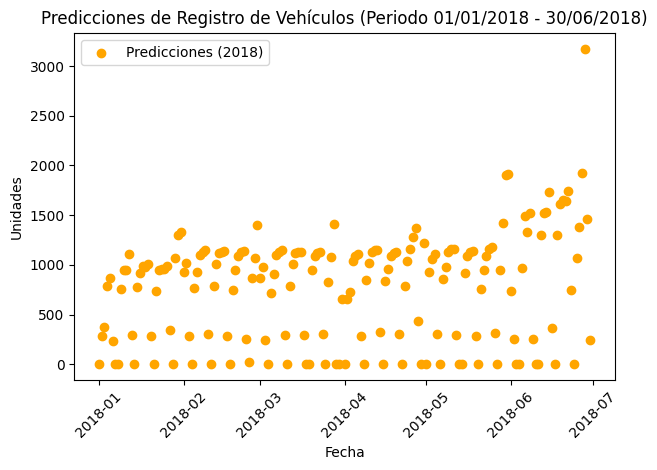

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Cargar datos de festivos
df_festivos = pd.read_csv('dias_festivos_colombia_2011_2018.csv')

# Crear un rango de fechas para el periodo 01/01/2018 al 30/06/2018
fechas_prediccion = pd.date_range(start='2018-01-01', end='2018-06-30', freq='D')

# Crear DataFrame para las predicciones
df_predicciones_2018 = pd.DataFrame({'Fecha': fechas_prediccion})

# Crear variable binaria para días festivos
df_predicciones_2018['EsFestivo'] = df_predicciones_2018['Fecha'].isin(pd.to_datetime(df_festivos['Fecha'])).astype(int)

# Crear variables adicionales
df_predicciones_2018['DiaSemana'] = df_predicciones_2018['Fecha'].dt.dayofweek
df_predicciones_2018['DiaMes'] = df_predicciones_2018['Fecha'].dt.day
df_predicciones_2018['Mes'] = df_predicciones_2018['Fecha'].dt.month

# Seleccionar variables explicativas
features = ['EsFestivo', 'DiaSemana', 'DiaMes', 'Mes']

# Normalizar variables
scaler = StandardScaler()
X_prediccion_scaled = scaler.fit_transform(df_predicciones_2018[features])

# Realizar predicciones para el periodo 01/01/2018 al 30/06/2018
predictions_2018 = best_model.predict(X_prediccion_scaled)

# Agregar predicciones al DataFrame de predicciones
df_predicciones_2018['Predicciones_2018'] = predictions_2018

# Visualizar las predicciones para el periodo 01/01/2018 al 30/06/2018
plt.scatter(df_predicciones_2018['Fecha'], df_predicciones_2018['Predicciones_2018'], label='Predicciones (2018)', color='orange')
plt.title('Predicciones de Registro de Vehículos (Periodo 01/01/2018 - 30/06/2018)')
plt.xlabel('Fecha')
plt.ylabel('Unidades')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

df_predicciones_2018 = df_predicciones_2018.drop(['EsFestivo','DiaSemana','DiaMes','Mes'], axis = 1)

df_predicciones_2018 = df_predicciones_2018.rename(columns = {'Predicciones_2018':'Prediccion'})

# Guardar predicciones en un archivo CSV para el periodo 01/01/2018 al 30/06/2018
df_predicciones_2018.to_csv('predicciones_periodo_2018.csv', index=False)


In [5]:
import pandas as pd
from sklearn.metrics import r2_score

# Cargar el primer archivo plano con predicciones para el periodo 01/01/2012 al 31/12/2016
df_predicciones_2016 = pd.read_csv('predicciones_periodo_2012-2016.csv')

# Convertir la columna 'Fecha' a tipo datetime
df_predicciones_2016['Fecha'] = pd.to_datetime(df_predicciones_2016['Fecha'])

# Fusionar DataFrames utilizando la columna 'Fecha'
df_fusion_2016 = pd.merge(df_registros, df_predicciones_2016[['Fecha', 'Prediccion']], on='Fecha', how='inner')

# Calcular R^2 para el conjunto de entrenamiento (01/01/2012 al 31/12/2016)
r2_entrenamiento = r2_score(df_fusion_2016['Unidades'], df_fusion_2016['Prediccion'])

# Mostrar R^2 para el conjunto de entrenamiento
print(f'R-squared (R2) entrenamiento: {r2_entrenamiento}')


R-squared (R2) entrenamiento: 0.9206277319447888
